In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [64]:
def f1(x):
    return x[0]

def f2(x):
    return 1 - (1/(4*np.pi**2))*(x[0]+np.pi)**2 + abs(x[1] - 5*np.cos(x[0]))**(1/3) + abs(x[2] - 5*np.sin(x[0]))**(1/3)

def outOfProperArea(coords):
    # warunki zgodne z tym, co jest w zadaniu
    if -np.pi > coords[0] or coords[0] > np.pi:
        return True
    if -5 > coords[1] or coords[1] > 5:
        return True
    if -5 > coords[2] or coords[2] > 5:
        return True

epsilon = 0.01 # na razie nie jest używany
nFunctions = 2

In [65]:
class Bird:
    def __init__(self, functionsList, nDim = 3, lowerLimit = 0, upperLimit = 5):
        self.loweLimit = lowerLimit
        self.upperLimit = upperLimit
        self.nDim = nDim
        self.functions = functionsList
        self.coords = self.initCoords()
        self.updateVals()
        
    def initCoords(self):
        return [random.uniform(self.loweLimit, self.upperLimit) for _ in range(self.nDim)]
    
    def updateVals(self):
        self.values = [fun(self.coords) for fun in self.functions]
        
    def getVals(self):
        return [fun(self.coords) for fun in self.functions]
        
    def __repr__(self):
        prec = int(np.ceil(-np.log10(epsilon)))
        return ', '.join(f' {item:.{prec}f}' if item > 0 else f'{item:.{prec}f}' for item in self.coords) + '     values: ' + ', '.join([f'{value:{prec}f}' for value in self.values])   
    
    def __getitem__(self, index):
        return self.coords[index]

In [66]:
n = 512 * 5
nDim = 3
population = [Bird([f1,f2], nDim=3) for _ in range(n)]

In [67]:
bestBird1 = min([[item.values[0], item] for item in population])[1]
bestBird2 = min([[item.values[1], item] for item in population])[1]
bestEvo = [[bestBird1, bestBird2]]

for k in tqdm(range(6000)):
    for bird in population:
        
        sigma = [max(abs(bird[dim]-bestBird1[dim]), abs(bird[dim]-bestBird2[dim])) for dim in range(nDim)]
        
        testCoords = [np.random.normal((bird[dim] + bestBird1[dim] + bestBird2[dim])/3, sigma[dim]) for dim in range(nDim)]
        
        if outOfProperArea(testCoords):
            continue
        
        testResults = [fun(testCoords) for fun in bird.functions]
        
        if [test <= current for test, current in zip(testResults, bird.values)] == [True, True]:
            bird.coords = testCoords
            bird.values = testResults
        
    bestBird1 = min([[item.values[0], item] for item in population])[1]
    bestBird2 = min([[item.values[1], item] for item in population])[1]
    bestEvo.append([bestBird1, bestBird2])

100%|██████████| 6000/6000 [12:03<00:00,  8.30it/s]


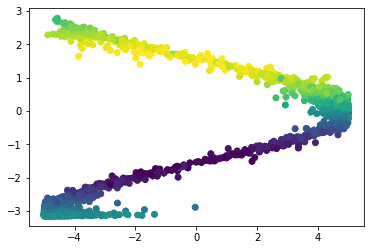

In [68]:
x = [bird[0] for bird in population]
y = [bird[1] for bird in population]
z = [bird[2] for bird in population]
plt.scatter(y, x, c = z)

In [69]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame([[bird[0], bird[1], bird[2]] for bird in population], columns=['x', 'y', 'z'])
px.scatter_3d(df, x='x', y='y', z='z', color='z')

In [57]:
import pickle

In [164]:
with open('./population.pickle', 'wb') as file:
    pickle.dump(population, file)

In [172]:
with open('./population.pickle', 'rb') as file:
    elo = pickle.load(file)